In [4]:
40+1000

1040

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

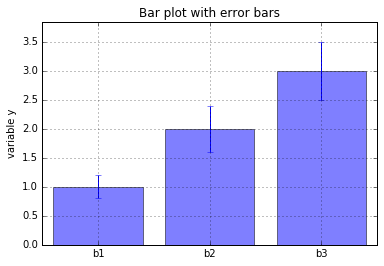

In [7]:
#
# just to make sure matplotlib is working!
#
# input data
#

mean_values = [1, 2, 3]
variance = [0.2, 0.4, 0.5]
bar_labels = ['b1', 'b2', 'b3']

# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, mean_values, yerr=variance, align='center', alpha=0.5)

plt.grid()

# set height of the y-axis
max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

# set axes labels and title
plt.ylabel('variable y')
plt.xticks(x_pos, bar_labels)
plt.title('Bar plot with error bars')

plt.show()

In [4]:
# Start of the iris.py starter code...

In [8]:
import numpy as np
from sklearn import cross_validation
import pandas as pd

print("+++ Start of pandas +++\n")
# For Pandas's read_csv, use header=0 when you know row 0 is a header row
# df here is a "dataframe":
df = pd.read_csv('iris.csv', header=0)    # read the file
df.head()                                 # first five lines
df.info()                                 # column details

+++ Start of pandas +++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallen    150 non-null float64
sepalwid    150 non-null float64
petallen    150 non-null float64
petalwid    150 non-null float64
irisname    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
print("Hi everyone!")
df

Hi everyone!


,sepallen,sepalwid,petallen,petalwid,irisname
0,5.7,2.8,4.1,1.3,unknown
1,6.3,3.3,6.0,2.5,unknown
2,6.2,2.9,4.3,1.3,unknown
3,5.1,2.5,3.0,1.1,unknown
4,5.4,3.4,1.5,0.4,unknown
5,5.2,4.1,1.5,0.1,unknown
6,5.8,2.7,5.1,1.9,unknown
7,5.7,2.9,4.2,1.3,unknown
8,4.8,3.1,1.6,0.2,unknown
9,5.1,3.5,1.4,0.2,setosa


In [6]:
df

,sepallen,sepalwid,petallen,petalwid,irisname
0,5.7,2.8,4.1,1.3,unknown
1,6.3,3.3,6.0,2.5,unknown
2,6.2,2.9,4.3,1.3,unknown
3,5.1,2.5,3.0,1.1,unknown
4,5.4,3.4,1.5,0.4,unknown
5,5.2,4.1,1.5,0.1,unknown
6,5.8,2.7,5.1,1.9,unknown
7,5.7,2.9,4.2,1.3,unknown
8,4.8,3.1,1.6,0.2,unknown
9,5.1,3.5,1.4,0.2,setosa


In [11]:
def transform(s):
    """ from string to number
          setosa -> 0
          versicolor -> 1
          virginica -> 2
    """
    d = { 'unknown':-1, 'setosa':0, 'versicolor':1, 'virginica':2 }
    return d[s]

print("Done!")

Done!


In [16]:
df['irisname'] = df['irisname'].map(transform) 
print("Done!")

Done!


In [10]:
df['irisname']

0     -1
1     -1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: irisname, dtype: int64

In [11]:
df

,sepallen,sepalwid,petallen,petalwid,irisname
0,5.7,2.8,4.1,1.3,-1
1,6.3,3.3,6.0,2.5,-1
2,6.2,2.9,4.3,1.3,-1
3,5.1,2.5,3.0,1.1,-1
4,5.4,3.4,1.5,0.4,-1
5,5.2,4.1,1.5,0.1,-1
6,5.8,2.7,5.1,1.9,-1
7,5.7,2.9,4.2,1.3,-1
8,4.8,3.1,1.6,0.2,-1
9,5.1,3.5,1.4,0.2,0


In [76]:
print("+++ Start of numpy/scikit-learn +++")
# Data needs to be in numpy arrays - these next two lines convert to numpy arrays
X_data_full = df.iloc[:,0:4].values        # iloc == "integer locations" of rows/cols
y_data_full = df[ 'irisname' ].values      # individually addressable columns (by name)


#
# we can drop the initial (unknown) rows -- if we want to test with known data
X_data_full = X_data_full[9:,:]   # 2d array
y_data_full = y_data_full[9:]     # 1d column


#
# we can scramble the remaining data if we want - only if we know the test set's labels
# 
indices = np.random.permutation(len(X_data_full))  # this scrambles the data each time
X_data_full = X_data_full[indices]
y_data_full = y_data_full[indices]

+++ Start of numpy/scikit-learn +++


In [77]:
y_data_full   # for examining the data...

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1,
       2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2,
       2, 0, 1], dtype=int64)

In [78]:
#
# The first nine are our test set - the rest are our training
#
X_test = X_data_full[0:9,0:4]              # the final testing data
X_train = X_data_full[9:,0:4]              # the training data

y_test = y_data_full[0:9]                  # the final testing outputs/labels (unknown)
y_train = y_data_full[9:]                  # the training outputs/labels (known)
print("Done!")

Done!


In [79]:
y_data_full

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1,
       2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2,
       2, 0, 1], dtype=int64)

In [80]:
#
# feature engineering...
#


# here is where you can re-scale/change column values...
# X_data[:,0] *= 100   # maybe the first column is worth 100x more!
# X_data[:,3] *= 100   # maybe the fourth column is worth 100x more!

print("Feature weighting!")

Feature weighting!


In [83]:
#
# here is where you'd loop to the search for the best value of k, the number of neighbors... ++++++
#

#
# create a kNN model and tune its parameters (just k!)
#   here's where you'll loop to run 5-fold (or 10-fold cross validation)
#   and loop to see which value of n_neighbors works best (best cv testing-data score)
#
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)   # 7 is the "k" in kNN

#
# here is where you'd start the 10-fold cross-validation loop ++++++
#

#
# cross-validate (use part of the training data for training - and part for testing)
#   first, create cross-validation data (here 3/4 train and 1/4 test)
cv_data_train, cv_data_test, cv_target_train, cv_target_test = \
    cross_validation.train_test_split(X_train, y_train, test_size=0.25) # random_state=0 

# fit the model using the cross-validation data
#   typically cross-validation is used to get a sense of how well it works
#   and tune any parameters, such as the k in kNN (3? 5? 7? 41?, etc.)
knn.fit(cv_data_train, cv_target_train) 
print("KNN cv training-data score:", knn.score(cv_data_train,cv_target_train))
print("KNN cv testing-data score:", knn.score(cv_data_test,cv_target_test))



KNN cv training-data score: 0.949494949495
KNN cv testing-data score: 0.969696969697


In [84]:
#
# now, train the model with ALL of the training data...  and predict the labels of the test set
#

# this next line is where the full training data is used for the model
knn.fit(X_train, y_train) 
print("\nCreated and trained a knn classifier")  #, knn

# here are some examples, printed out:
print("iris's X_test's predicted outputs are")
print(knn.predict(X_test))

# and here are the actual labels (iris types)
print("and the actual labels are")
print(y_test)


Created and trained a knn classifier
iris's X_test's predicted outputs are
[1 1 1 1 0 0 0 2 0]
and the actual labels are
[1 1 1 1 0 0 0 1 0]


In [18]:

#
# for testing values typed in
#
def test_by_hand(knn):
    """ allows the user to enter values and predict the
        label using the knn model passed in
    """
    print()
    Arr = np.array([[0,0,0,0]]) # correct-shape array
    T = Arr[0]
    T[0] = float(input("sepal length? "))
    T[1] = float(input("sepal width? "))
    T[2] = float(input("petal length? "))
    T[3] = float(input("petal width? "))
    prediction = knn.predict(Arr)[0]
    print("The prediction is", prediction)
    print()


# print("Done!")
test_by_hand( knn )  # watch out for the global scope - it can get tricky!

# In class: let's make this better (with the actual name!)


sepal length? 1.2
sepal width? 3.4
petal length? 2.2
petal width? 0.8
The prediction is 0



In [19]:
"""
Comments and results:

Briefly mention how this went:
  + what value of k did you decide on for your kNN?
  + how smoothly did this kNN workflow go...



Then, include the predicted labels of the first 9 irises (with "unknown" type)
Paste those labels (or both data and labels here)
You'll have 9 lines:





"""
print("Done!")

Done!
